In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm
import os, glob

import seaborn as sns
mako = sns.color_palette("mako", as_cmap=True)

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150
plt.ioff()

In [4]:
data = {} # data[L, p] contains (fail_rate, density)
for f in glob.glob('data/run_9/run_9_*_*.npy'):
    L = int(f.split("_")[3])
    p = int(f.split("_")[4])
    n = int(f.split("_")[5].split(".")[0])
    data[L, p, n] = np.load(f)

In [7]:
data_array = np.empty((5, 20, 10), dtype = np.float32)
for i in range(5):
    L = 20 * (i + 1)
    for j in range(20):
        p = 40 + j
        for n in range(10):
            try:
                data_array[i, j, n] = data[L, p, n]
            except Exception:
                data_array[i, j, n] = np.NaN

In [9]:
fail_rate = np.nanmean(data_array, axis = 2)

In [10]:
L_ticks = np.linspace(20, 100, 5).astype(int)
p_ticks = np.linspace(40, 59, 20) / 10000
p_labels = p_ticks # Spaghetti code

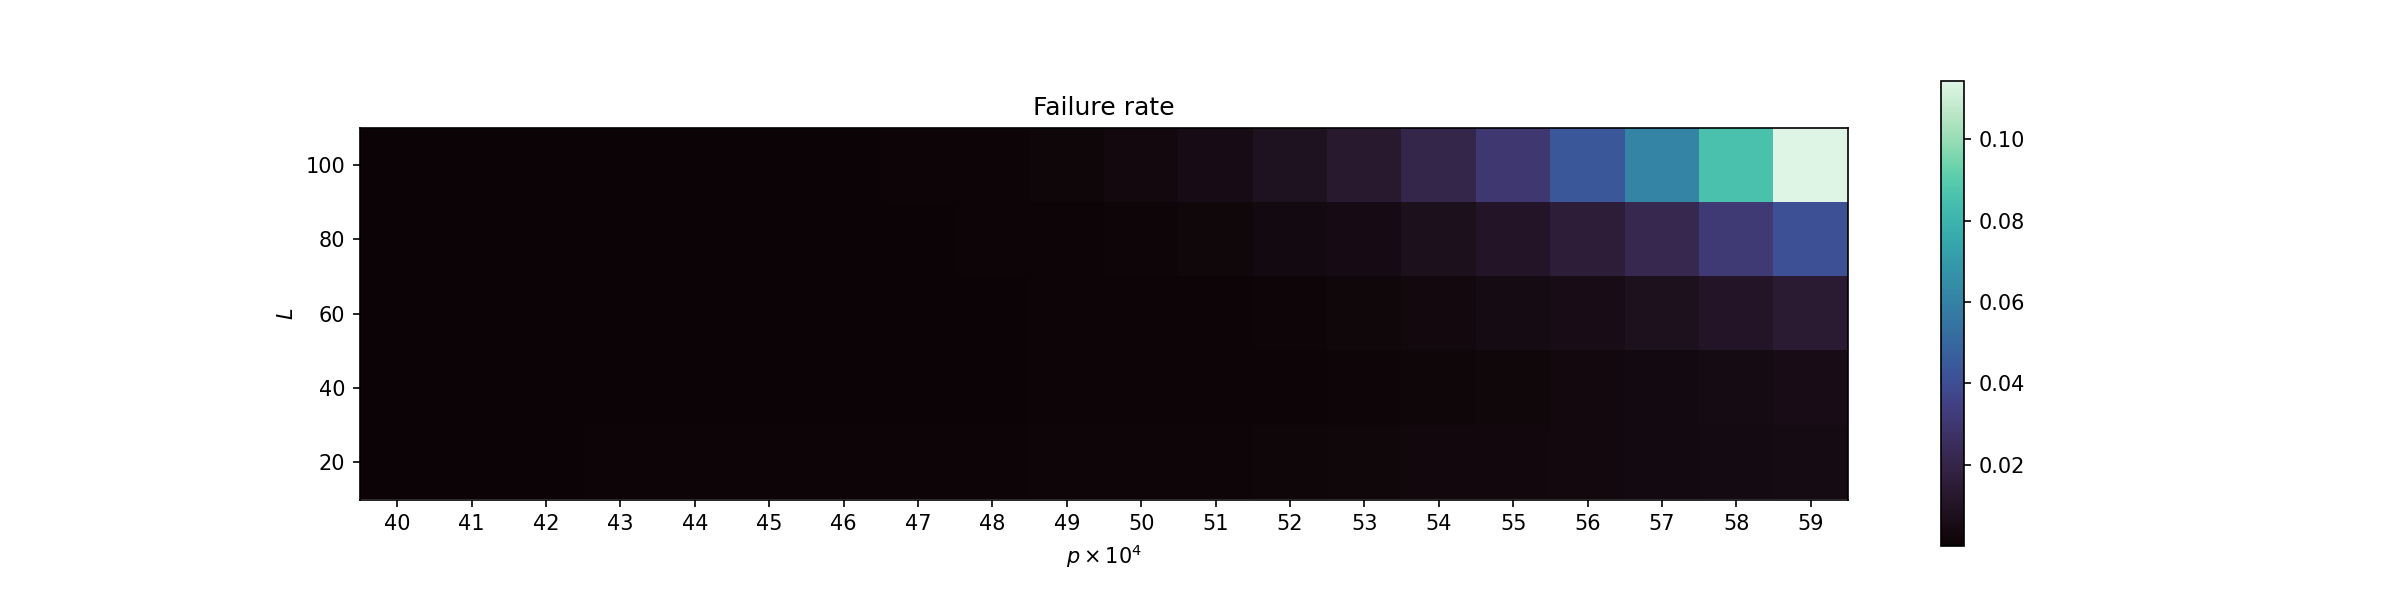

In [17]:
plt.matshow(fail_rate, cmap = mako, origin = 'lower')
plt.colorbar()
plt.title("Failure rate")
plt.ylabel("$L$")
plt.xlabel(r"$p\times10^4$")
plt.yticks(range(5), L_ticks)
plt.xticks(range(20), np.linspace(40, 59, 20).astype(int))
ax = plt.gca()
ax.xaxis.tick_bottom()
plt.savefig("plots/run9_fail_heatmap.png")
plt.show()

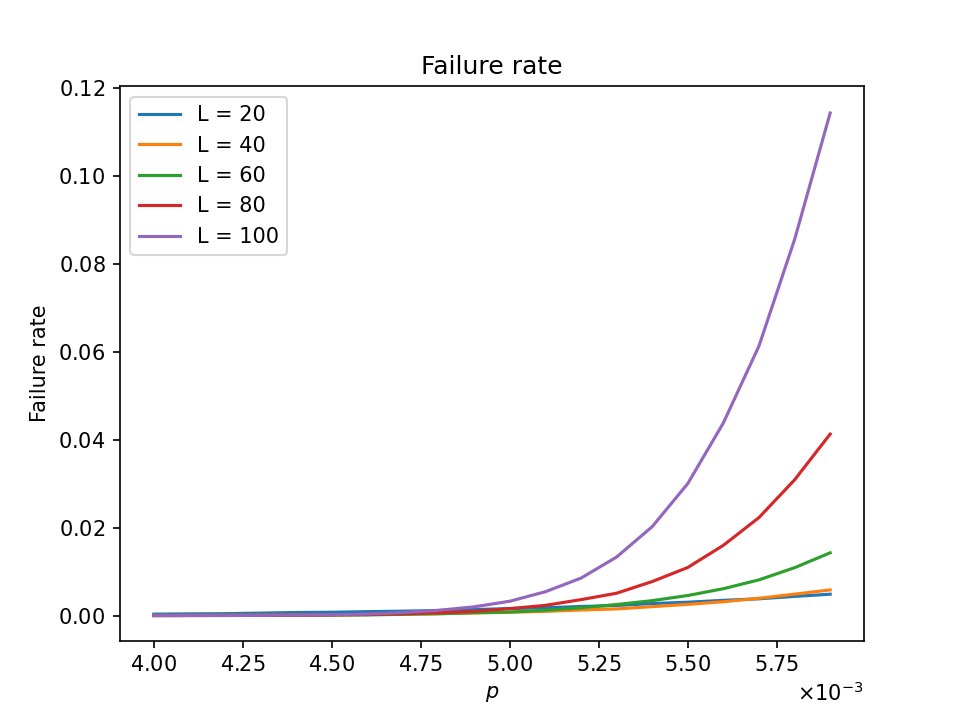

In [26]:
plt.clf()
for i in range(5):
    L = 20*(i+1)
    plt.plot(p_ticks, fail_rate[i], label = f"L = {L}")
    error = np.sqrt(fail_rate[i] * (1 - fail_rate[i])) / 1000
    plt.fill_between(p_ticks, fail_rate[i]-error, fail_rate[i]+error, alpha = 0.5)
plt.legend()
plt.title("Failure rate")
plt.xlabel("$p$")
plt.ylabel("Failure rate")
# plt.xticks()
plt.ticklabel_format(scilimits = (-3, 3), useMathText = True)
plt.savefig("plots/run9_fail_linear.png")
plt.show()

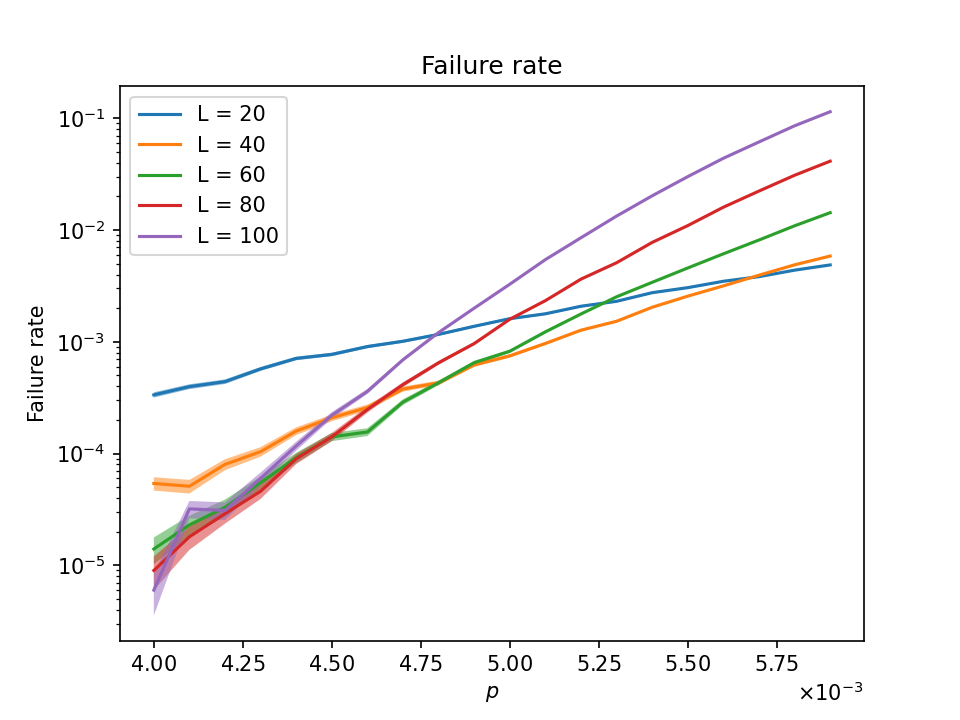

In [27]:
plt.clf()
for i in range(5):
    L = 20*(i+1)
    plt.plot(p_ticks, fail_rate[i], label = f"L = {L}")
    error = np.sqrt(fail_rate[i] * (1 - fail_rate[i])) / 1000
    plt.fill_between(p_ticks, fail_rate[i]-error, fail_rate[i]+error, alpha = 0.5)
plt.legend()
plt.title("Failure rate")
plt.xlabel("$p$")
plt.ylabel("Failure rate")
plt.ticklabel_format(scilimits = (-3, 3), useMathText = True)
plt.yscale("log")
plt.savefig("plots/run9_fail_log.png")
plt.show()